In [40]:

# overall sentiment VS ratings - 
# sentiments over time?


# able to categorize the reviews into different factors?


In [2]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import string

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\niyai\git\british-analysis\British_Airway_Review_cleaned.csv')

In [5]:
# into a single string text, with each review separated by a space
text = " ".join(review for review in df.cleaned_reviews)

In [6]:
# remove all punctuation characters from the text
text = text.translate(str.maketrans('', '', string.punctuation))

In [7]:
stop_words = set(STOPWORDS)
stop_words.update(['ba', 'flight', 'flights', 'british', 'airway', 'airways'])

In [8]:
# removing any extra whitespace and ensuring that the list only contains non-empty words
cleaned_words = [word for word in text.split() if word.strip()]

# convert into lowercase
# checking words against stopwords
cleaned_words = [word.lower() for word in cleaned_words if word.lower() not in stop_words]

In [14]:
word_freq = pd.Series(cleaned_words).value_counts()
df_word_freq = word_freq.reset_index()
df_word_freq.columns = ['Word', 'Frequency']

# Plot the treemap
fig = px.treemap(df_word_freq.head(50), path=['Word'], values='Frequency', title='Most Frequent Words')
fig.show()

(-0.5, 1599.5, 799.5, -0.5)

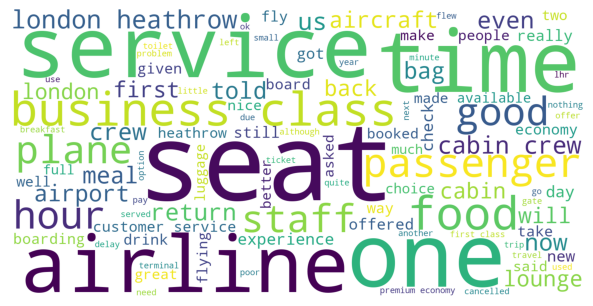

In [16]:
wc=WordCloud(background_color='white',max_words=100,max_font_size=300,width=1600,height=800, stopwords=stop_words)
wc.generate(" ".join(cleaned_words))

plt.imshow(wc)
plt.tight_layout()
plt.savefig('Most_discussed_terms.png',bbox_inches='tight')
plt.axis('off')

In [22]:
df['cleaned_reviews']

0         I had the most fantastic BA Flight today. Th...
1         Couldn’t book in online. Arrived at check in...
2        London Heathrow to Mumbai in a Boeing 787-8 i...
3        Keflavík, Iceland to London Heathrow on an A3...
4        Terrible Experience with British Airways. I b...
                              ...                        
2495    Roundtrip with British Airways from Bangkok to...
2496    Awful customer service. My wife and I have flo...
2497    I travelled from London to Sydney via Singapor...
2498    British Airways have just moved Cape Town flig...
2499    Bengaluru to Heathrow. My first long haul flig...
Name: cleaned_reviews, Length: 2500, dtype: object

In [17]:
df['tb_polarity'] = df['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['tb_subjectivity'] = df['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [18]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [19]:
df['tbp_analysis'] = df['tb_polarity'].apply(getAnalysis )

In [20]:
df.groupby(['tbp_analysis']).size().reset_index(name='count')

,tbp_analysis,count
0,Negative,793
1,Neutral,13
2,Positive,1694


In [21]:
df_textblob = df.groupby(['recommended', 'tbp_analysis']).size().reset_index(name='count')

chart_textblob = px.bar(
    df_textblob,
    x = "recommended",
    y = "count",
    color = 'tbp_analysis',
    barmode = 'group', text_auto=True,
    color_discrete_map = {'Negative': 'red', 'Neutral': 'blue', 'Positive': 'green'}
)
chart_textblob


In [23]:
sentiment = SentimentIntensityAnalyzer()

In [24]:
df['v_polarity'] = df['cleaned_reviews'].apply(lambda x: sentiment.polarity_scores(x))
df['v_compound']  = df['v_polarity'].apply(lambda score_dict: score_dict['compound'])
df['v_comp_score'] = df['v_compound'].apply(lambda c: 'Positive' if c > 0 else ('Neutral' if c == 0 else 'Negative'))


In [25]:
df.groupby(['v_comp_score']).size().reset_index(name='count')

,v_comp_score,count
0,Negative,1123
1,Neutral,6
2,Positive,1371


In [27]:
df_vader = df.groupby(['recommended', 'v_comp_score']).size().reset_index(name='count')

chart_vader = px.bar(
    df_vader,
    x = "recommended",
    y = "count",
    color = 'v_comp_score',
    barmode = 'group', text_auto=True,
    color_discrete_map = {'Negative': 'red', 'Neutral': 'blue', 'Positive': 'green'}
)
chart_vader


In [28]:
# df[(df['stars'] == 1) & (df['v_comp_score'] == 'Positive')]['cleaned_reviews']

In [ ]:
# pd.set_option('display.max_colwidth', None)

In [31]:
v_test = df.groupby(['ym', 'v_comp_score']).size().reset_index(name='count')

px.line(
    v_test,
    x = "ym",
    y = "count",
    color = 'v_comp_score',
    color_discrete_map = {'Negative': 'red', 'Neutral': 'blue', 'Positive': 'green'}
)